In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.1

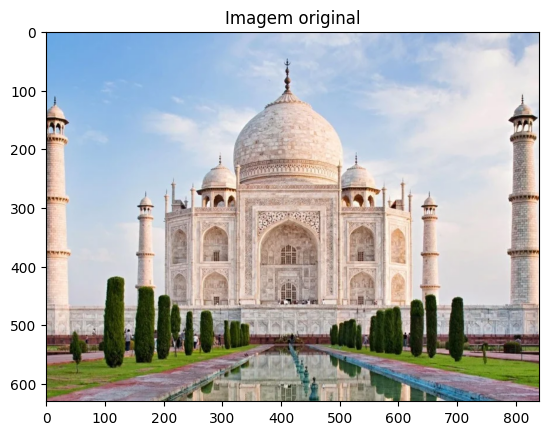

In [6]:
image = cv2.imread("./imgs/taj-mahal-og.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Imagem original")
plt.show()

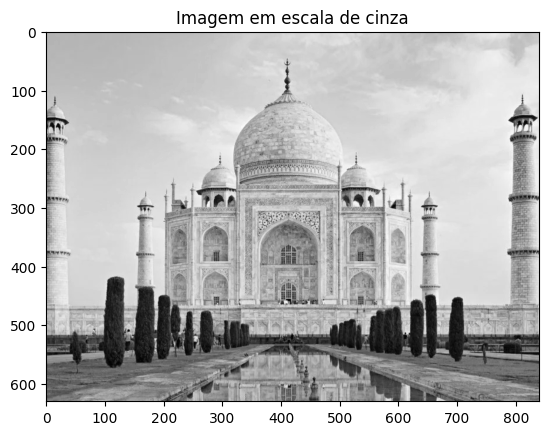

In [7]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

Kernel total: 0

Kernel shape:
(3, 3)

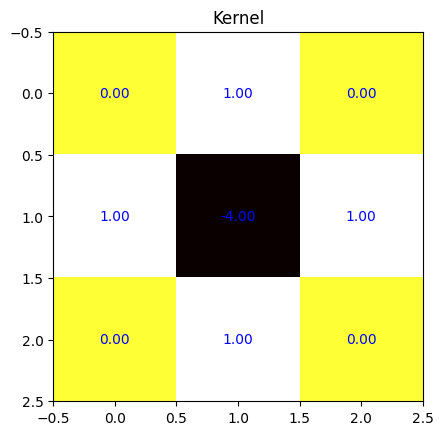

In [9]:
kernel = [
    [0,1,0],
    [1,-4,1],
    [0,1,0]
]

kernel = np.array(kernel, dtype="int")
kernel_total = np.sum(kernel) 
print("Kernel total:", kernel_total)
print("Kernel shape:", kernel.shape)

# plot kernel heatmap
plt.imshow(kernel, cmap="hot")
plt.title("Kernel")
kernel_size = kernel.shape[0]
# add numbers to heatmap
for i in range(kernel_size):
    for j in range(kernel_size):
        plt.text(i, j, f"{kernel[i,j]:.2f}", ha="center", va="center", color="blue")
plt.show()

In [10]:
def apply_conv(img,kernel):
    width , height = img.shape
    k_width, k_height = kernel.shape
    new_image = np.zeros((width+ k_width-1, height+ k_height-1), dtype="float32")
    sample_w = (k_width - 1) // 2
    sample_h = (k_height - 1) // 2
    for x in range(sample_w, width-sample_w):
        for y in range(sample_h, height-sample_h):
            img_sample = img[
                x-sample_w:x+sample_w+1,
                y-sample_h:y+sample_h+1
            ]
            newpixel = img_sample * kernel
            new_image[x,y] = np.sum(newpixel)
    new_image = new_image[sample_w:width-sample_w, sample_h:height-sample_h]
    #new_image = np.clip(new_image, 0, 255).astype("uint8")
    return new_image

In [11]:
blured = apply_conv(gray, np.ones((3,3), dtype="float32")/9)
new_image = apply_conv(blured, kernel)
new_image = np.clip(new_image, 0, 255).astype("uint8")

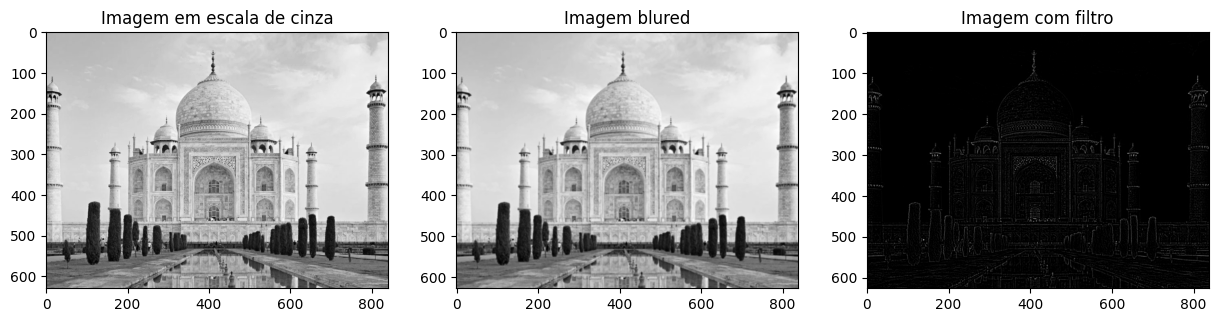

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Imagem em escala de cinza")

axs[1].imshow(blured, cmap="gray")
axs[1].set_title("Imagem blured")

axs[2].imshow(new_image, cmap="gray")
axs[2].set_title("Imagem com filtro")
plt.show()